# PLOT THE DATA

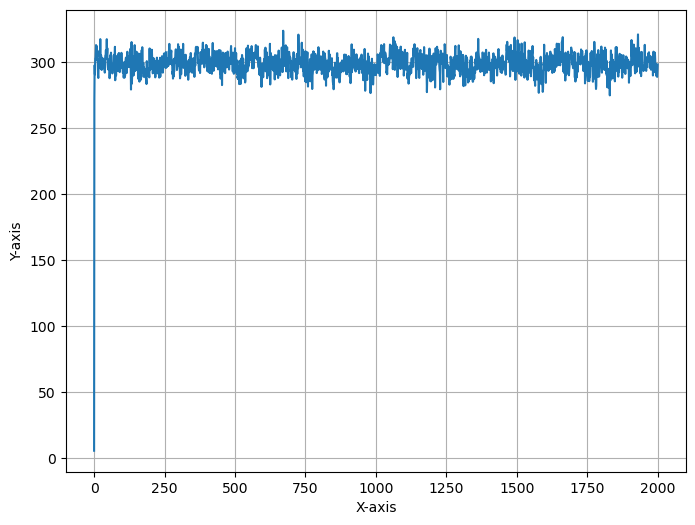

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def read_xvg(file_path):
    """
    Reads a .xvg file and extracts data, skipping comments and metadata.

    Args:
        file_path (str): Path to the .xvg file.

    Returns:
        tuple: A tuple containing two numpy arrays for x and y data.
    """
    x = []
    y = []

    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#') or line.startswith('@'):
                # Skip comments and metadata lines
                continue
            split_line = line.split()
            if len(split_line) >= 2:
                x.append(float(split_line[0]))
                y.append(float(split_line[1]))

    return np.array(x), np.array(y)

def plot_xvg_data(file_path, title="", xlabel="X-axis", ylabel="Y-axis"):
    """
    Reads and plots data from a .xvg file.

    Args:
        file_path (str): Path to the .xvg file.
        title (str): Plot title.
        xlabel (str): Label for the X-axis.
        ylabel (str): Label for the Y-axis.
    """
    x, y = read_xvg(file_path)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Data', linewidth=1.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Example usage:
# Replace 'example.xvg' with the path to your .xvg file
file_path = "nvt-temp.xvg"
plot_xvg_data(file_path)

,Metric,Value
0,Mean Potential Energy,1.994216e+06
1,Standard Deviation,2.976994e+02
2,Coefficient of Variation (%),1.492814e-02
3,Standard Error,1.882778e+00



🔍 Equilibration Status:
✅ The system is equilibrated based on statistical metrics.


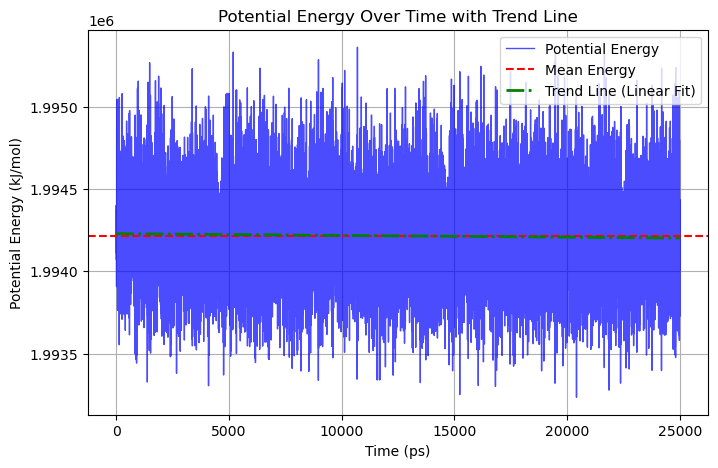

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define file path (Update if needed)
file_path = "prd-ep.xvg"

# Load data while ignoring metadata lines (comments starting with "@" or "#")
try:
    data = np.loadtxt(file_path, comments=["@", "#"])
except Exception as e:
    print(f"Error reading file: {e}")
    data = None

if data is not None:
    # Extract time (first column) and potential energy (second column)
    time = data[:, 0]
    potential_energy = data[:, 1]

    # Compute statistical metrics
    mean_potential_energy = np.mean(potential_energy)
    std_potential_energy = np.std(potential_energy)
    cv_potential_energy = (std_potential_energy / mean_potential_energy) * 100  # Coefficient of Variation (%)
    standard_error_potential_energy = std_potential_energy / np.sqrt(len(potential_energy))

    # Define equilibration criteria
    equilibration_criteria = {
        "std_threshold": 500,   # Standard deviation should be < 500 kJ/mol
        "cv_threshold": 1.0,    # Coefficient of Variation (%) should be < 1%
        "se_threshold": 5.0     # Standard Error should be < 5 kJ/mol
    }

    # Check if the system is equilibrated
    is_equilibrated = (
        std_potential_energy < equilibration_criteria["std_threshold"] and
        cv_potential_energy < equilibration_criteria["cv_threshold"] and
        standard_error_potential_energy < equilibration_criteria["se_threshold"]
    )

    # Generate equilibration message
    if is_equilibrated:
        equilibration_message = "✅ The system is equilibrated based on statistical metrics."
    else:
        equilibration_message = "❌ The system is NOT equilibrated yet. Consider extending the equilibration time."

    # Create a summary dictionary
    summary_potential_energy = {
        "Metric": ["Mean Potential Energy", "Standard Deviation", "Coefficient of Variation (%)", "Standard Error"],
        "Value": [mean_potential_energy, std_potential_energy, cv_potential_energy, standard_error_potential_energy]
    }

    # Convert to DataFrame for display
    df_summary = pd.DataFrame(summary_potential_energy)

    # Display the summary table
    from IPython.display import display
    display(df_summary)

    # Print equilibration status
    print("\n🔍 Equilibration Status:")
    print(equilibration_message)

    # Perform linear regression for trend line
    slope, intercept, _, _, _ = linregress(time, potential_energy)
    trend_line = slope * time + intercept

    # Plot potential energy over time with trend line
    plt.figure(figsize=(8, 5))
    plt.plot(time, potential_energy, label="Potential Energy", color="b", linewidth=1, alpha=0.7)
    plt.axhline(mean_potential_energy, color="r", linestyle="--", label="Mean Energy")
    plt.plot(time, trend_line, color="g", linestyle="-.", linewidth=2, label="Trend Line (Linear Fit)")
    plt.xlabel("Time (ps)")
    plt.ylabel("Potential Energy (kJ/mol)")
    plt.title("Potential Energy Over Time with Trend Line")
    plt.legend()
    plt.grid()
    plt.show()


,Metric,Value
0,Mean Potential Energy,298.797972
1,Standard Deviation,9.625267
2,Coefficient of Variation (%),3.221329
3,Standard Error,0.215174



🔍 Equilibration Status:
❌ The system is NOT equilibrated yet. Consider extending the equilibration time.


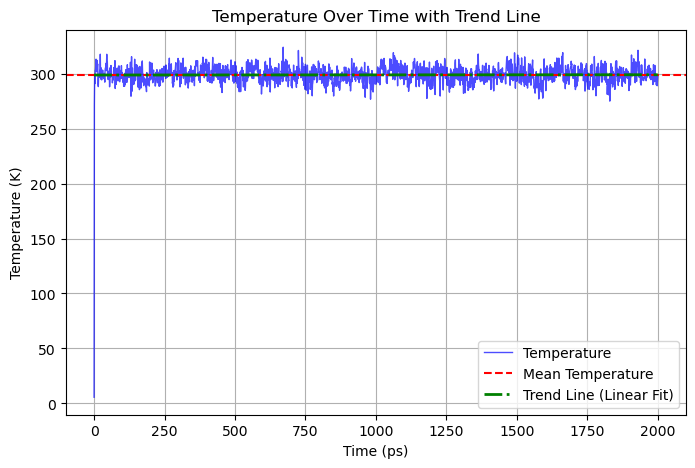

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define file path (Update if needed)
file_path = "nvt-temp.xvg"

# Load data while ignoring metadata lines (comments starting with "@" or "#")
try:
    data = np.loadtxt(file_path, comments=["@", "#"])
except Exception as e:
    print(f"Error reading file: {e}")
    data = None

if data is not None:
    # Extract time (first column) and potential energy (second column)
    time = data[:, 0]
    temperature = data[:, 1]

    # Compute statistical metrics
    mean_potential_energy = np.mean(temperature)
    std_potential_energy = np.std(temperature)
    cv_potential_energy = (std_potential_energy / mean_potential_energy) * 100  # Coefficient of Variation (%)
    standard_error_potential_energy = std_potential_energy / np.sqrt(len(temperature))

    # Define equilibration criteria
    equilibration_criteria = {
        "std_threshold": 5.0,  
        "cv_threshold": 2.0,   
        "se_threshold": 1.0    
    }

    # Check if the system is equilibrated
    is_equilibrated = (
        std_potential_energy < equilibration_criteria["std_threshold"] and
        cv_potential_energy < equilibration_criteria["cv_threshold"] and
        standard_error_potential_energy < equilibration_criteria["se_threshold"]
    )

    # Generate equilibration message
    if is_equilibrated:
        equilibration_message = "✅ The system is equilibrated based on statistical metrics."
    else:
        equilibration_message = "❌ The system is NOT equilibrated yet. Consider extending the equilibration time."

    # Create a summary dictionary
    summary_potential_energy = {
        "Metric": ["Mean Potential Energy", "Standard Deviation", "Coefficient of Variation (%)", "Standard Error"],
        "Value": [mean_potential_energy, std_potential_energy, cv_potential_energy, standard_error_potential_energy]
    }

    # Convert to DataFrame for display
    df_summary = pd.DataFrame(summary_potential_energy)

    # Display the summary table
    from IPython.display import display
    display(df_summary)

    # Print equilibration status
    print("\n🔍 Equilibration Status:")
    print(equilibration_message)

    # Perform linear regression for trend line
    slope, intercept, _, _, _ = linregress(time, potential_energy)
    trend_line = slope * time + intercept

    # Plot potential energy over time with trend line
    plt.figure(figsize=(8, 5))
    plt.plot(time, potential_energy, label="Temperature", color="b", linewidth=1, alpha=0.7)
    plt.axhline(mean_potential_energy, color="r", linestyle="--", label="Mean Temperature")
    plt.plot(time, trend_line, color="g", linestyle="-.", linewidth=2, label="Trend Line (Linear Fit)")
    plt.xlabel("Time (ps)")
    plt.ylabel("Temperature (K)")
    plt.title("Temperature Over Time with Trend Line")
    plt.legend()
    plt.grid()
    plt.show()
